## Import the useful modules

The python functions must be *imported* from modules before called in a program.

A command starts with '```%```' is called a magic command, according to documentatiton:

>Magics are specific to and provided by the IPython kernel. Whether magics are available on a kernel is a decision that is made by the kernel developer on a per-kernel basis. 

In our case, the 

> ```%matplotlib inline```

command will enable Jupyter notebook to show plots generated by matplotlib directly in the notebook

In [2]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read the friendly manual

When in trouble, always start with reading the manual/documentation -- you may be be surprised how informative they are.

When functions are created in Python, there is an option to include a "docstring", and good libraries/modules always include these for their functions.

In general in Python, you can access the docstring for a function using
> ```help(functionName)``` 
where functionName is the name of the function


However, Jupyter has a better way to read the docstrings in a separate window overlay at the bottom of the browser window. To access it, type
> ```?functionName``` 

or 

> ```?moduleName``` 
for help on a module

Let's start by reading the docstring for the scipy.stats.norm module:

In [18]:
?stats.norm

The docstring for stats.norm lists all of the functions that the stats.norm module provides, and for each one lists the possible parameters

It also provides notes about the distribution in question. For instance, stats.norm contains functions for the Normal distribution (which we call the Gaussian distribution). 

We see that the pdf (probability density function) for the Normal distribution with no parameters is given by
$$
\frac{1}{2\pi} \operatorname{exp}\left( - \frac{x^2}{2} \right)
$$

We also see that when the ``loc`` and ``scale`` parameters are given, then ``norm.pdf(x, loc, scale)`` is identically
equivalent to ``norm.pdf(y) / scale`` with
``y = (x - loc) / scale`` 

Later, we will see that this means that ``loc`` is the mean of the distribution, and ``scale`` is the standard deviation (or ``scale``^2 is the variance) 

Note that the call signature for the cdf function is:
``cdf(x, loc=0, scale=1)``
    Cumulative density function.
    
If we inspect the parameters, we will see that there are 2 different types of parameters. The first is a positional parameter ``x``, and the second type are the keyword parameters indicated by ``loc=0`` and ``scale=1``. Positional parameters are required, but keyword parameters are optional and have the default values shown.  In otherwords, if you type

> stats.norm.cdf(0.5)

it will calculate the same value of the cdf as if you typed

> stats.norm.cdf(0.5,loc=0,scale=1)

Let's try it:

In [22]:
stats.norm.cdf(0.5)

0.69146246127401312

In [23]:
stats.norm.cdf(0.5,loc=0,scale=1)

0.69146246127401312

## A search engine is your friend

Searching for "theCommandYouWantToLearn" plus "documentation" can usuallly bring you to the right page

## Typical methods for continuous distributions in ```scipy.stats```

|method|discription|
|---|---|
|pdf|Probability density function.|
|cdf|Cumulative distribution function.|
|mean|Mean of the distribution.|
|var|Variance of the distribution.|
|std|Standard deviation of the distribution.|
|median|Median of the distribution.|
|sf |Survival function (also defined as 1 - cdf, but sf is sometimes more accurate).|
|ppf|Percent point function (inverse of cdf — percentiles).|
|fit|Parameter estimates for generic data.|




### Example for discrete random variables

> ```scipy.stats.poisson```

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson

In [7]:
stats.poisson.pmf(k=1, mu=0.6, loc=0)

0.3292869816564159

### The complete list of random distributions in ```scipy.stats```

http://docs.scipy.org/doc/scipy/reference/stats.html

## Draw the PDF and CDF of normal distribution

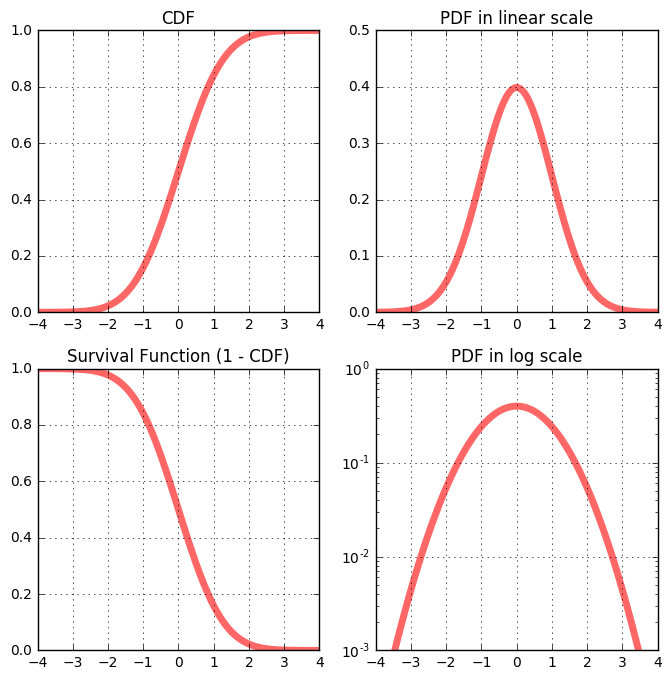

In [8]:
# make up some data in the interval ]0, 1[
x = np.linspace(-4, 4, 100)
cdf = stats.norm.cdf(x)
pdf = stats.norm.pdf(x)
sf = stats.norm.sf(x)

plt.figure(figsize=([8, 8]))

# Draw CDF
plt.subplot(221)
plt.plot(x, cdf, 'r-', lw=5, alpha=0.6)
plt.yscale('linear')
plt.title('CDF')
plt.xlim([-4, 4])
plt.ylim([0, 1])
plt.grid(True)

# Draw PDF linear
plt.subplot(222)
plt.plot(x, pdf, 'r-', lw=5, alpha=0.6)
plt.yscale('linear')
plt.title('PDF in linear scale')
plt.xlim([-4, 4])
plt.ylim([0, 0.5])
plt.grid(True)

# Draw Survival Function
plt.subplot(223)
plt.plot(x, sf, 'r-', lw=5, alpha=0.6)
plt.yscale('linear')
plt.title('Survival Function (1 - CDF)')
plt.xlim([-4, 4])
plt.ylim([0, 1])
plt.grid(True)

# Draw PDF in log scale
plt.subplot(224)
plt.plot(x, pdf, 'r-', lw=5, alpha=0.6)
plt.yscale('log')
plt.title('PDF in log scale')
plt.xlim([-4, 4])
plt.ylim([10 ** -3, 1])
plt.grid(True)

## Check accuracy of CDF and PDF:

In [9]:
r = stats.norm.rvs(size=100000) # generate 100000 random numbers with normal distribution

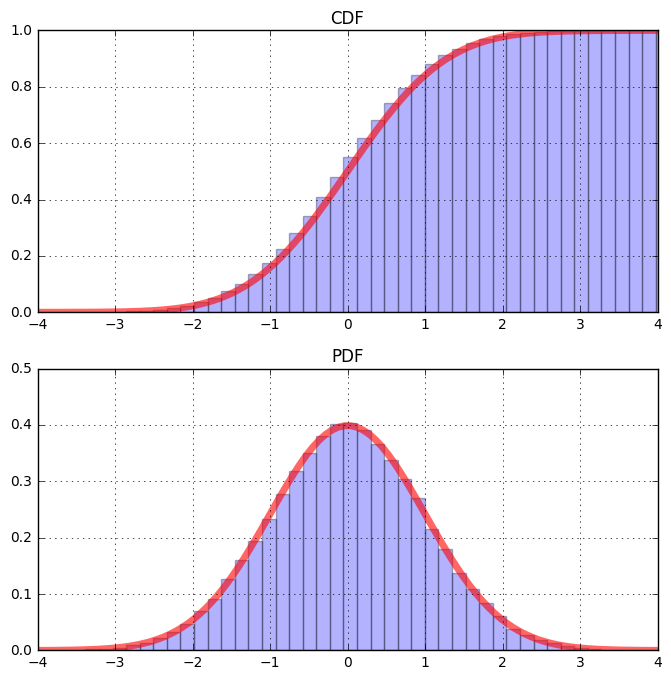

In [10]:
plt.figure(figsize=([8, 8]))

# Draw CDF
plt.subplot(211) 
plt.hist(r, bins=50, normed=True, cumulative=True, alpha=0.3, color='b') #cumulative histogram
plt.plot(x, cdf, 'r-', lw=5, alpha=0.6)
plt.yscale('linear')
plt.title('CDF')
plt.xlim([-4, 4])
plt.ylim([0, 1])
plt.grid(True)

# Draw PDF linear
plt.subplot(212)
plt.hist(r, bins=50, normed=True, cumulative=False, alpha=0.3, color='b')
plt.plot(x, pdf, 'r-', lw=5, alpha=0.6)
plt.yscale('linear')
plt.title('PDF')
plt.xlim([-4, 4])
plt.ylim([0, 0.5])
plt.grid(True)